In [1184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)

# #1 EDA

In [1185]:
df =pd.read_csv('train.csv')
df.shape

(1460, 81)

In [1186]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1187]:
# lets find missing values 
na_feat = [features for features in df.columns if df[features].isnull().sum()>1]
for feature in na_feat:
    print(feature, np.round(df[feature].isnull().mean(), 4),'missing values')

LotFrontage 0.1774 missing values
Alley 0.9377 missing values
MasVnrType 0.0055 missing values
MasVnrArea 0.0055 missing values
BsmtQual 0.0253 missing values
BsmtCond 0.0253 missing values
BsmtExposure 0.026 missing values
BsmtFinType1 0.0253 missing values
BsmtFinType2 0.026 missing values
FireplaceQu 0.4726 missing values
GarageType 0.0555 missing values
GarageYrBlt 0.0555 missing values
GarageFinish 0.0555 missing values
GarageQual 0.0555 missing values
GarageCond 0.0555 missing values
PoolQC 0.9952 missing values
Fence 0.8075 missing values
MiscFeature 0.963 missing values


In [1188]:
# features that is needed to be dropped
for feature in na_feat:
    if df[feature].isnull().sum()>690:
        print(feature)

Alley
PoolQC
Fence
MiscFeature


In [1189]:
# lets find out list of numerical features
num_feat = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Numerical features', len(num_feat))
df[num_feat].head()

Numerical features 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [1190]:
# lets find temporal featues (ie Datetime variables)
year_feat = [feature for feature in num_feat if 'Yr' in feature or 'Year' in feature or 'year' in feature]
year_feat

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

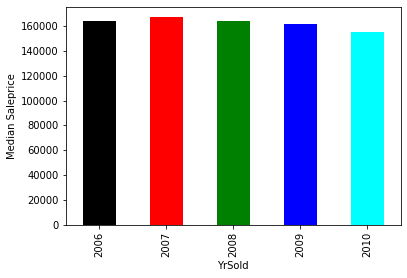

In [1191]:
# We will check whether there is a relation between year the house is sold and the sales price
df.groupby('YrSold')['SalePrice'].median().plot(kind='bar',color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xlabel('YrSold')
plt.ylabel('Median Saleprice')
plt.show()

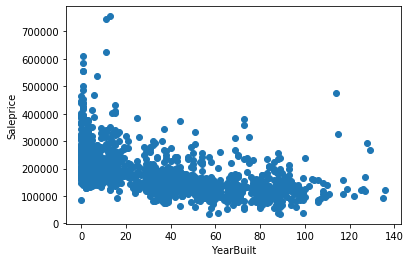

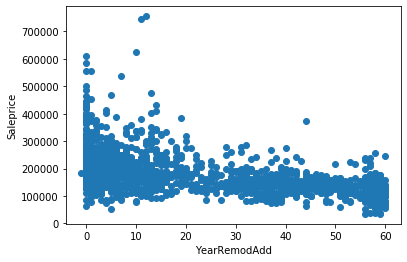

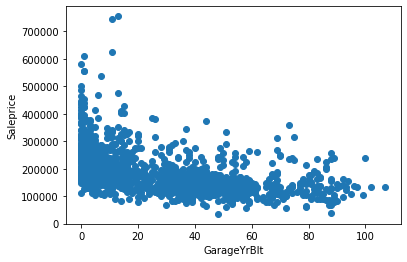

In [1192]:
# Here we will compare the difference between All years feature with SalePrice
for feature in year_feat:
    if feature != 'YrSold':
        data = df.copy()
# We will capture the difference between year feature and year the house was sold for  
        data[feature] = data['YrSold'] - data[feature]
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Saleprice')
        plt.show()

In [1193]:
# dropping features with maximum  issing value
df.drop(['Alley','PoolQC','Fence','MiscFeature','Electrical'],axis=1, inplace=True)

In [1194]:
# lets find out list of categorical features
cat_feat = [feature for feature in df.columns if df[feature].dtype == 'O']
cat_feat

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [1195]:
for feature in cat_feat:
    print("The feature {} with no. of categories {} ". format(feature,len(df[feature].unique())))

The feature MSZoning with no. of categories 5 
The feature Street with no. of categories 2 
The feature LotShape with no. of categories 4 
The feature LandContour with no. of categories 4 
The feature Utilities with no. of categories 2 
The feature LotConfig with no. of categories 5 
The feature LandSlope with no. of categories 3 
The feature Neighborhood with no. of categories 25 
The feature Condition1 with no. of categories 9 
The feature Condition2 with no. of categories 8 
The feature BldgType with no. of categories 5 
The feature HouseStyle with no. of categories 8 
The feature RoofStyle with no. of categories 6 
The feature RoofMatl with no. of categories 8 
The feature Exterior1st with no. of categories 15 
The feature Exterior2nd with no. of categories 16 
The feature MasVnrType with no. of categories 5 
The feature ExterQual with no. of categories 4 
The feature ExterCond with no. of categories 5 
The feature Foundation with no. of categories 6 
The feature BsmtQual with no. 

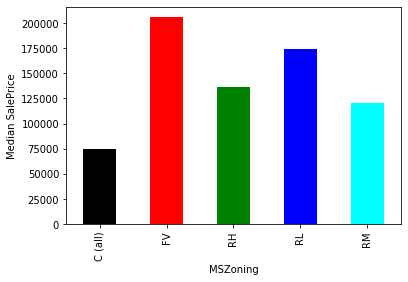

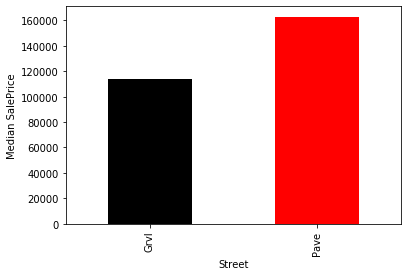

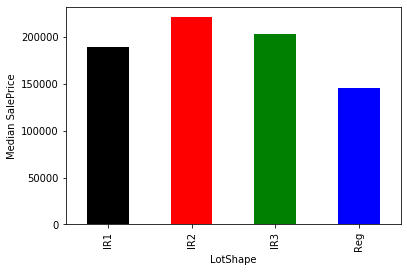

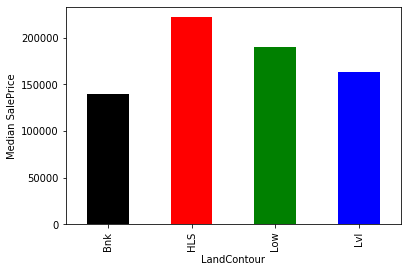

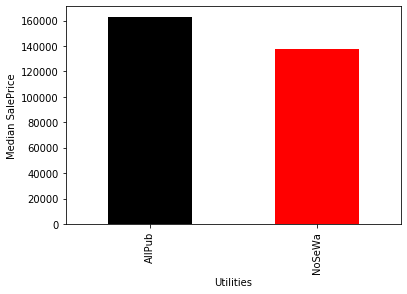

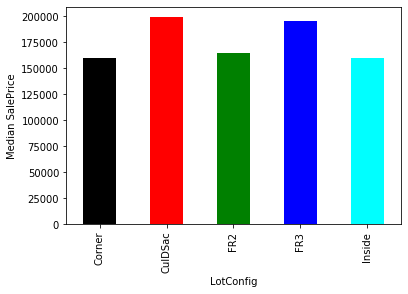

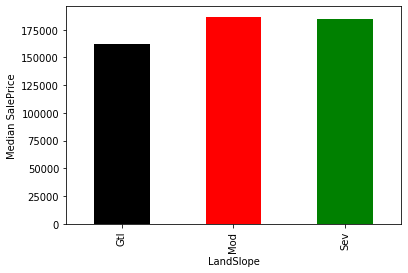

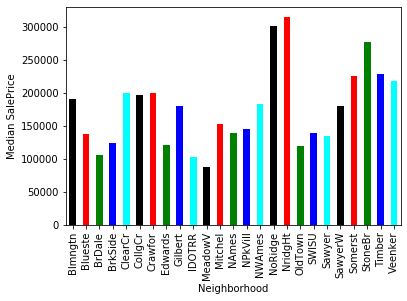

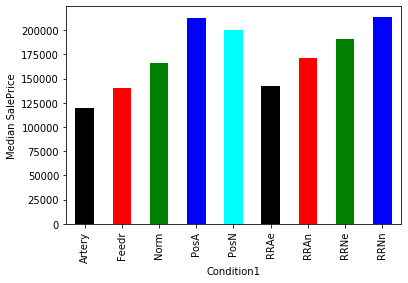

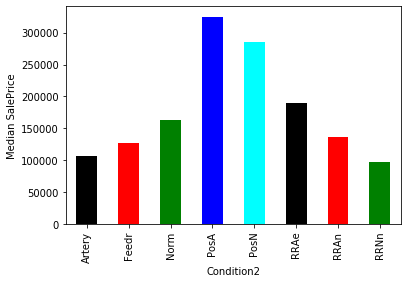

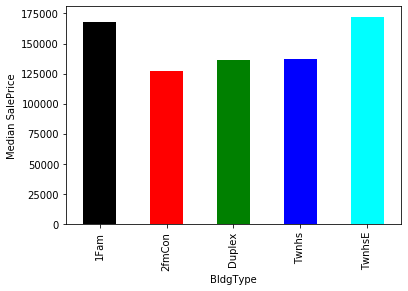

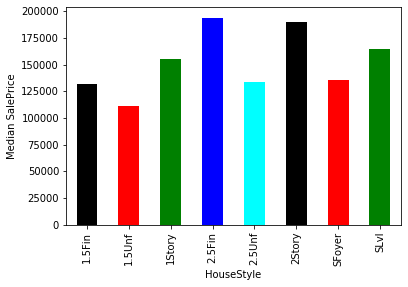

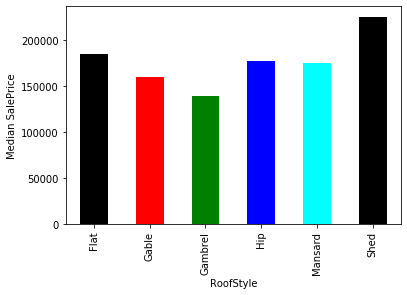

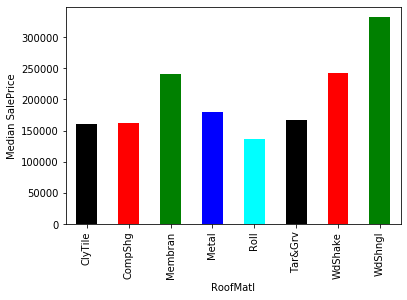

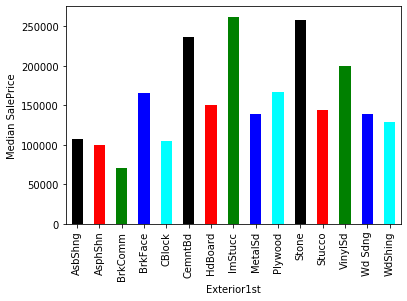

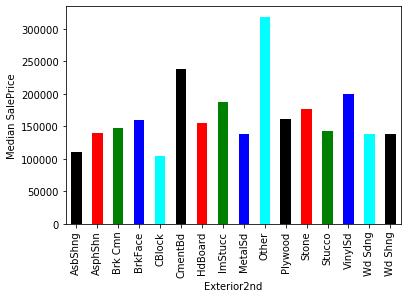

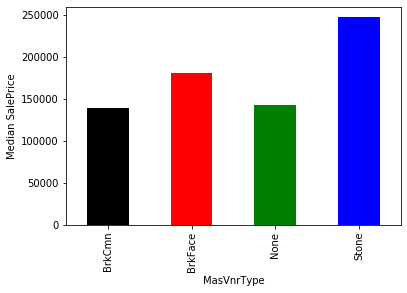

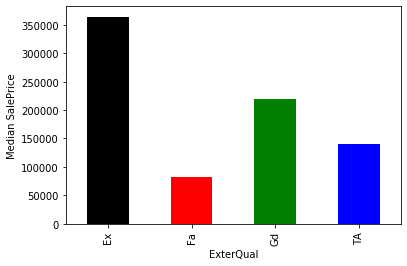

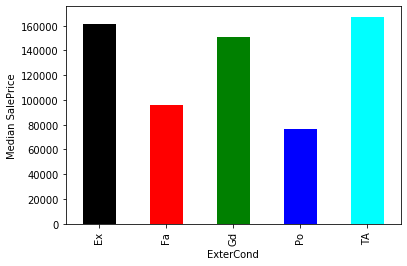

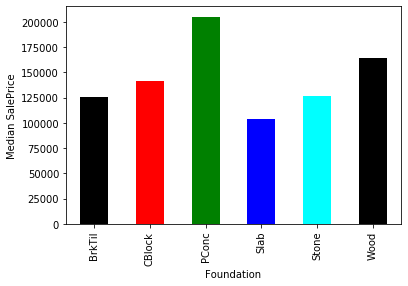

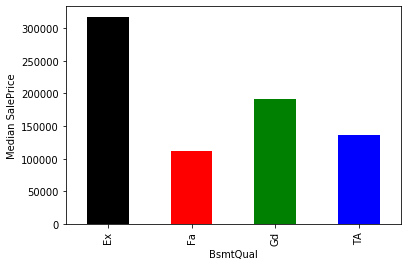

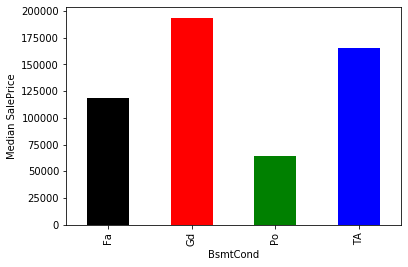

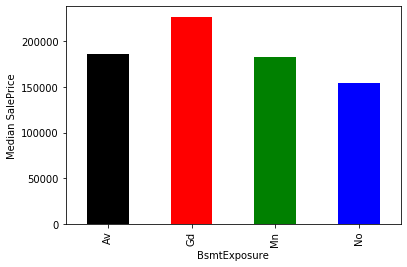

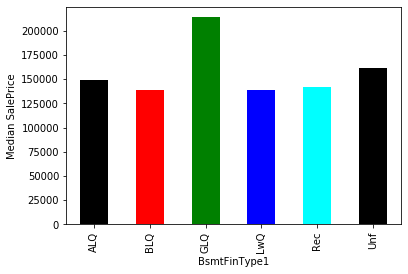

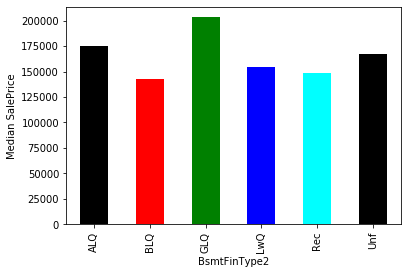

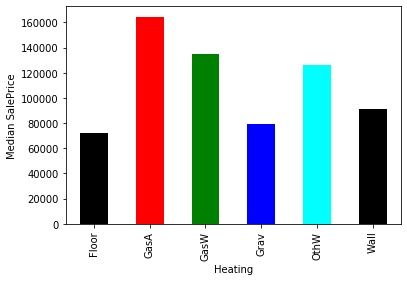

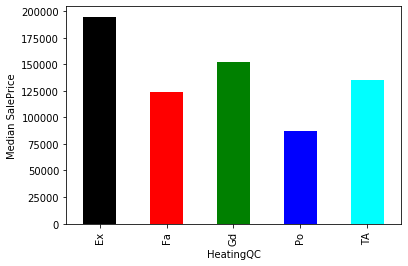

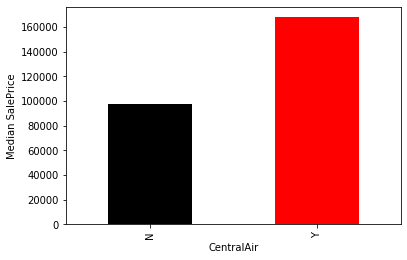

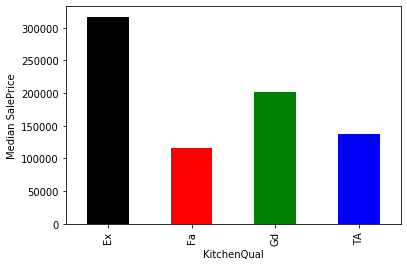

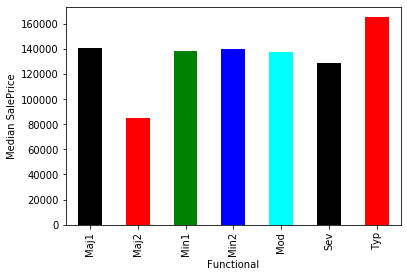

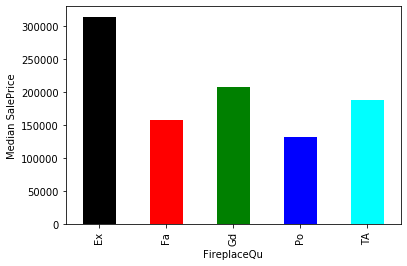

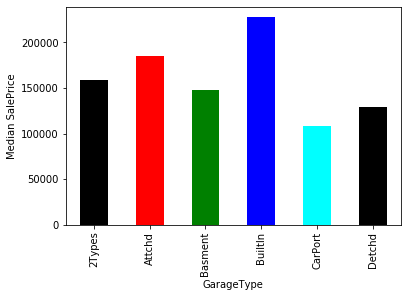

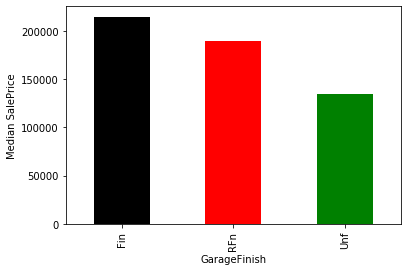

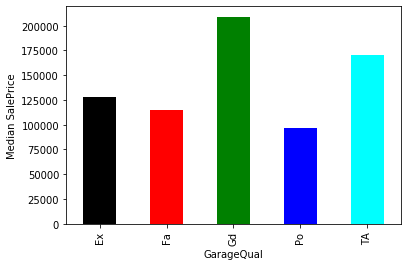

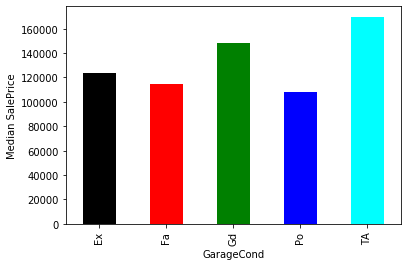

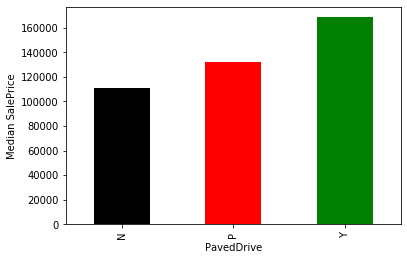

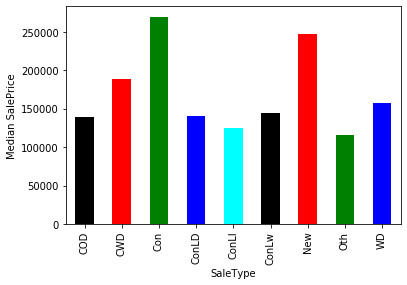

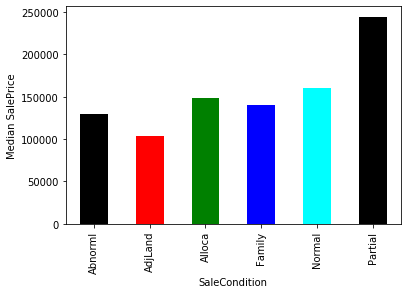

In [1196]:
for feature in cat_feat:
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot(kind='bar',color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.xlabel(feature)
    plt.ylabel('Median SalePrice')
    plt.show()

## #2 FEATURE ENGINEERING

In [1197]:
# dropping features with maximum  issing value
# df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1, inplace=True)

In [1198]:
cat_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtype=='O']

In [1199]:
num_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtype !='O']
print(num_nan)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [1200]:
df[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].isnull().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [1201]:
df[['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond']].isnull().sum()

MasVnrType        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [1202]:
# filling catgorical missing value
for feature in cat_nan:
    df[feature].fillna(df[feature].mode()[0],inplace=True)

In [1203]:
# filling numerical missing value
for feature in num_feat:
    df[feature].fillna(df[feature].mean(),inplace=True)

In [1204]:
## Temporal Variables (Date Time Variables)

for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    df[feature] = df['YrSold']-df[feature]

In [1205]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [1206]:
from sklearn.preprocessing import LabelEncoder
for label in cat_feat:
    le = LabelEncoder()   
    df[label]= le.fit_transform(df[label])

In [1207]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,5,5,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,1,5.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,31,31,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,31.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,7,6,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,7.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,91,36,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,8.0,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,8,8,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,1,8.0,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,250000


In [1208]:
feature_scale = [feature for feature in df.columns if feature not in['Id','SalePrice']]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler()

In [1209]:
scaler.transform(df[feature_scale])

array([[0.23529412, 0.75      , 0.15068493, ..., 0.5       , 1.        ,
        0.8       ],
       [0.        , 0.75      , 0.20205479, ..., 0.25      , 1.        ,
        0.8       ],
       [0.23529412, 0.75      , 0.1609589 , ..., 0.5       , 1.        ,
        0.8       ],
       ...,
       [0.29411765, 0.75      , 0.15410959, ..., 1.        , 1.        ,
        0.8       ],
       [0.        , 0.75      , 0.1609589 , ..., 1.        , 1.        ,
        0.8       ],
       [0.        , 0.75      , 0.18493151, ..., 0.5       , 1.        ,
        0.8       ]])

In [1210]:
# trial_df = df.copy()

# Xx= trial_df.iloc[:,1:76]

# yy = trial_df.iloc[:,75]

# from sklearn.model_selection import train_test_split
# Xtrain,Xtest,ytrain,ytest = train_test_split(Xx,yy, test_size=0.25, random_state=42)

# from sklearn.ensemble import RandomForestRegressor
# rr = RandomForestRegressor()
# rr.fit(Xtrain,ytrain)

# trial_pred = rr.predict(Xtest)

# trial_pred.astype('int')

# Now repeat steps on Test data

In [1211]:
tdf = pd.read_csv('test.csv')

In [1212]:
tdf.drop(['Alley','PoolQC','Fence','MiscFeature','Electrical'],axis=1, inplace=True)

tcat_feat = [feature for feature in tdf.columns if tdf[feature].dtype == 'O']
tcat_feat

# filling catgorical missing value
for feature in tcat_feat:
    tdf[feature].fillna(tdf[feature].mode()[0],inplace=True)


tnum_feat = [feature for feature in tdf.columns if tdf[feature].dtype != 'O']

# filling numerical missing value
for feature in tnum_feat:
    tdf[feature].fillna(tdf[feature].mean(),inplace=True)

for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    tdf[feature] = tdf['YrSold']-tdf[feature]

from sklearn.preprocessing import LabelEncoder
for label in tcat_feat:
    tle = LabelEncoder()   
    tdf[label]= tle.fit_transform(tdf[label])

feature_scale = [feature for feature in tdf.columns if feature not in['Id']]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(tdf[feature_scale])

scaler.transform(tdf[feature_scale])

array([[0.        , 0.5       , 0.32960894, ..., 1.        , 1.        ,
        0.8       ],
       [0.        , 0.75      , 0.33519553, ..., 1.        , 1.        ,
        0.8       ],
       [0.23529412, 0.75      , 0.29608939, ..., 1.        , 1.        ,
        0.8       ],
       ...,
       [0.        , 0.75      , 0.77653631, ..., 0.        , 1.        ,
        0.        ],
       [0.38235294, 0.75      , 0.22905028, ..., 0.        , 1.        ,
        0.8       ],
       [0.23529412, 0.75      , 0.29608939, ..., 0.        , 1.        ,
        0.8       ]])

In [1213]:
y_train = df[['SalePrice']]

In [1214]:
# Dropping the dependent feature
X_train = df.drop(['Id','SalePrice'], axis=1)
X_test = tdf.drop(['Id'], axis=1)

In [1215]:
X_train.shape

(1460, 74)

In [1216]:
X_test.shape

(1459, 74)

In [1217]:
y_train.shape

(1460, 1)

In [1218]:
y_train

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


# FEATURE SELECTION

In [1177]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [1130]:
feat_sel_mod = SelectFromModel(Lasso(alpha=15, random_state=42))
feat_sel_mod

SelectFromModel(estimator=Lasso(alpha=15, random_state=42))

In [1131]:
feat_sel_mod.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=15, random_state=42))

In [1132]:
feat_sel_mod.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [1133]:
selected_feat = X_train.columns[feat_sel_mod.get_support()]
# some stats
print('Total features : {}'.format(X_train.shape[1]))
print('Selected features : {}'.format(len(selected_feat)))

Total features : 74
Selected features : 73


In [1134]:
selected_feat

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'Enclosed

In [1135]:
X_train = X_train[selected_feat]
X_test = X_test[selected_feat]

In [1219]:
from sklearn.ensemble import RandomForestRegressor
rr = RandomForestRegressor(n_estimators=900)
rr.fit(X_train,y_train)

C:\Users\Tanmay\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(n_estimators=900)

In [1220]:
y_pred = rr.predict(X_test)

In [1221]:
y_pred = y_pred.astype('int')

In [1222]:
y_pred

array([125585, 154033, 180827, ..., 153036, 114751, 228379])

In [1223]:
##Create Sample Submission file and Submit 
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

In [1224]:
datasets

,Id,SalePrice
0,1461,125585
1,1462,154033
2,1463,180827
3,1464,181079
4,1465,197480
...,...,...
1454,2915,86085
1455,2916,86681
1456,2917,153036
1457,2918,114751


### THANKS FOR YOUR TIME, REALLY APPRECIATE IT